In [1]:
import random
import os
import numpy as np
import torch
import json
from tqdm import tqdm
import pandas as pd
from transformers import RobertaTokenizer
from transformers import AutoTokenizer, AutoModel

In [2]:
df = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/translatedCleaned.tsv", sep="\t").drop(columns=["titleText1", "titleText2"])

In [4]:
#for getting non-translated data only 
#df = df[(df["url1_lang"] == "en") & (df["url2_lang"] == "en")]

In [5]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')

In [6]:
#TODO: need to fill in na's with ""

In [7]:
# merged head and tail of text according to 
#head_length and tail_length 
def trunc_text(text, tokenizer, head_length, tail_length):

    text_ids = tokenizer.encode(text)[1:-1]

    #if we don't enough text that we need to take some 
    #head and tail, then we just take the original text
    if len(text_ids) < head_length + tail_length: 
        return text
    
    #if we have extra text, we want to take some
    #from the beginning and some from the end 
    else: 
        head_trunc_ids = text_ids[:head_length]
        tail_trunc_ids = text_ids[-tail_length:]
        head_trunc_tokens = tokenizer.decode(head_trunc_ids)
        tail_trunc_tokens = tokenizer.decode(tail_trunc_ids)
        
        return head_trunc_tokens + tail_trunc_tokens 
        
    """
    if trunc_pos == 'head':
        text_trunc_ids = text_ids[:head_length]
        
    elif trunc_pos == 'tail':
        #how much extra tail to grab 
        extra = len(text_ids) - head_length
        
        #if we have enough text to get full head and tail 
        if extra >= tail_length: 
            text_trunc_ids = text_ids[-tail_length:]
            
        #if we can grab some of the tail but not the full amount we wanted    
        elif extra < tail_length and extra > 0: 
            text_trunc_ids = text_ids[-extra:]

        else: 
            return ""
    """
    
    

In [8]:
df["text1"][0]

'MARTINSBURG, W.Va. — A suspected drunken driver was arrested in a New Year’s Day highway crash that killed another motorist in West Virginia, police said.\n\nThe accident occurred early Wednesday along southbound Interstate 81 in Berkeley County, The Journal reported.\n\nCody Wade Braithwaite, 32, of Winchester, Virginia, was charged with DUI with death, fleeing DUI, and being a prohibited person in possession of a firearm and a fugitive from justice, Berkeley County Sheriff Curtis Keller said.\n\nKeller said a deputy investigating calls about a reckless driver attempted to make a traffic stop, but the suspect’s vehicle sped up and hit a car, which then struck a guardrail. The driver of the car was pronounced dead at the scene. The driver’s name was not immediately released.\n\nThe suspect’s vehicle also hit a deputy’s cruiser before being stopped, Keller said.\n\nBraithwaite was being held without bond in the Eastern Regional Jail. It wasn’t immediately known whether Braithwaite has 

In [9]:
trunc_text(df["text1"][0], tokenizer, 10, 20)

'martinsburg, w. va. — a suspectedreserved. this material may not be published, broadcast, rewritten or redistributed.'

In [10]:
#following columns are for non-translated data
#df = df.dropna(subset=["ogTitle1", "ogTitle2", "ogText1", "ogText2"])

In [11]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'url1_lang', 'url2_lang', 'pair_id',
       'link1', 'link2', 'ia_link1', 'ia_link2', 'Geography', 'Entities',
       'Time', 'Narrative', 'Overall', 'Style', 'Tone', 'id1', 'id2', 'text1',
       'title1', 'text2', 'title2'],
      dtype='object')

In [12]:
#we replace na's with empty strings so that when we merge
#the na values don't override the string in the other column 
df[["title1", "title2", "text1", "text2"]] = df[["title1", "title2", "text1", "text2"]].fillna("")

In [13]:
df["titleText1"] = df["title1"] + df["text1"]
df["titleText2"] = df["title2"] + df["text2"]


In [14]:
HEAD_COUNT = 288
TAIL_COUNT = 96

In [15]:
df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])

Token indices sequence length is longer than the specified maximum sequence length for this model (708 > 512). Running this sequence through the model will result in indexing errors


In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Character Counts in Articles')

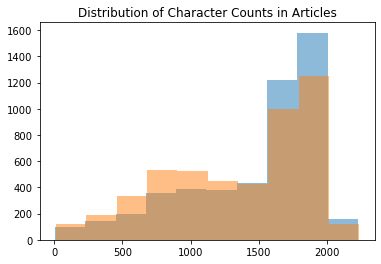

In [16]:
#this seems about right. We see a relatively hard cutoff 
#which corresponds to our total token count of 384
plt.hist(df["text1Merged"].apply(len), alpha=.5)
plt.hist(df["text2Merged"].apply(len), alpha=.5)
plt.title("Distribution of Character Counts in Articles")

In [132]:
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/translated_288_96.tsv", sep="\t")

In [133]:
enDf = df[(df["url1_lang"] == "en") & (df["url1_lang"] == "en")]
enDf.to_csv("/shared/3/projects/newsDiffusion/data/processed/en_288_96.tsv", sep="\t")

In [134]:
#write files for different proportion 
HEAD_COUNT = 192
TAIL_COUNT = 192
df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/translated_192_192.tsv", sep="\t")

enDf = df[(df["url1_lang"] == "en") & (df["url1_lang"] == "en")]
enDf.to_csv("/shared/3/projects/newsDiffusion/data/processed/en_192_192.tsv", sep="\t")

In [136]:
#write files for different proportion 
HEAD_COUNT = 384
TAIL_COUNT = 0
df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/translated_384_0.tsv", sep="\t")

enDf = df[(df["url1_lang"] == "en") & (df["url1_lang"] == "en")]
enDf.to_csv("/shared/3/projects/newsDiffusion/data/processed/en_384_0.tsv", sep="\t")


In [17]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

In [138]:
#write files for different proportion 
HEAD_COUNT = 200
TAIL_COUNT = 56
df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/translated_200_56.tsv", sep="\t")

enDf = df[(df["url1_lang"] == "en") & (df["url1_lang"] == "en")]
enDf.to_csv("/shared/3/projects/newsDiffusion/data/processed/en_200_56.tsv", sep="\t")

Token indices sequence length is longer than the specified maximum sequence length for this model (789 > 512). Running this sequence through the model will result in indexing errors


In [139]:
#write files for different proportion 
HEAD_COUNT = 256
TAIL_COUNT = 0
df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/translated_256_0.tsv", sep="\t")

enDf = df[(df["url1_lang"] == "en") & (df["url1_lang"] == "en")]
enDf.to_csv("/shared/3/projects/newsDiffusion/data/processed/en_256_0.tsv", sep="\t")

In [18]:
#now do the same thing with the test data 
df = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/enTestData.tsv", sep="\t")

In [19]:
#we replace na's with empty strings so that when we merge
#the na values don't override the string in the other column 
df[["title1", "title2", "text1", "text2"]] = df[["title1", "title2", "text1", "text2"]].fillna("")

df["titleText1"] = df["title1"] + df["text1"]
df["titleText2"] = df["title2"] + df["text2"]

In [24]:
#since 288 + 96 performed well we want to use this 
HEAD_COUNT = 288
TAIL_COUNT = 96

df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/enTest_288_96.tsv", sep="\t")


In [25]:
#since 288 + 96 performed well we want to use this 
HEAD_COUNT = 200
TAIL_COUNT = 56

df["text1Merged"] = df["titleText1"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df["text2Merged"] = df["titleText2"].apply(trunc_text, args=[tokenizer, HEAD_COUNT, TAIL_COUNT])
df.to_csv("/shared/3/projects/newsDiffusion/data/processed/enTest_200_56.tsv", sep="\t")